# Salary_Data_Assigment


In [1]:
# load the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
Salary=pd.read_csv('Salary_Data_Assignment_4.csv')
Salary.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
Salary.shape

(30, 2)

In [4]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# EDA and Visualization

In [5]:
Salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
Salary_1= Salary.rename(columns={'YearsExperience':'YE','Salary':'SL'},inplace=False)
Salary_1.head(5)

,YE,SL
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YE', ylabel='Density'>

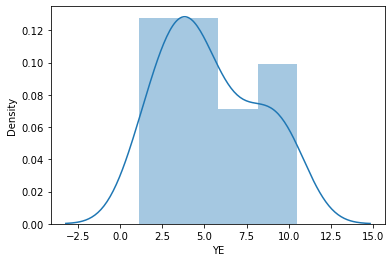

In [7]:
sns.distplot(Salary_1['YE'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SL', ylabel='Density'>

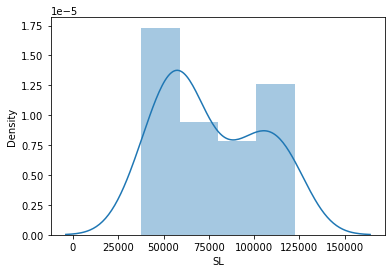

In [8]:
sns.distplot(Salary_1['SL'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YE'>

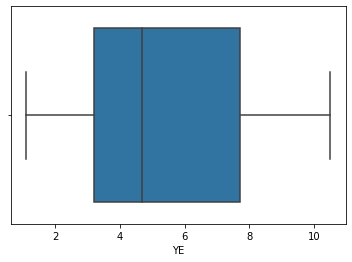

In [9]:
sns.boxplot(Salary_1['YE'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SL'>

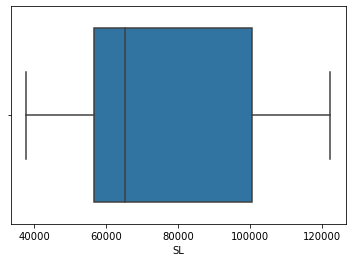

In [10]:
sns.boxplot(Salary_1['SL'])

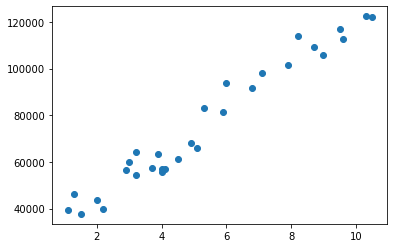

In [11]:
plt.scatter(x=Salary_1['YE'],y=Salary_1['SL'])

'''There is direct relation between salary and year of experience, year of experience increase salary increase.'''

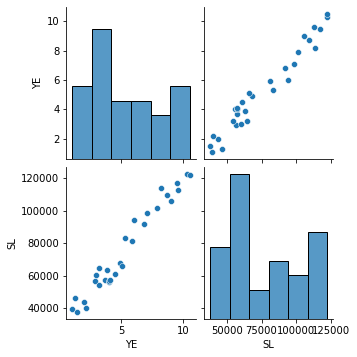

In [12]:
sns.pairplot(Salary_1)

In [13]:
Salary_1.corr()

,YE,SL
YE,1.000000,0.978242
SL,0.978242,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


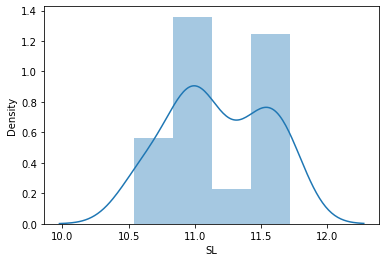

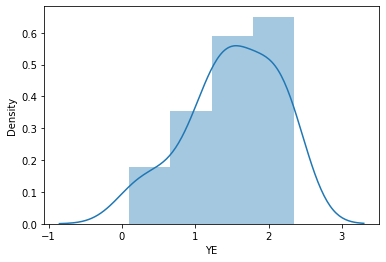

<Figure size 432x288 with 0 Axes>

In [14]:
# Performing Log transformation
Data_1=Salary_1
Data_1['SL'] = np.log(Data_1['SL'])
Data_1['YE']=np.log(Data_1['YE'])
sns.distplot(Data_1['SL'])
fig=plt.figure()
sns.distplot(Data_1['YE'])
fig= plt.figure()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


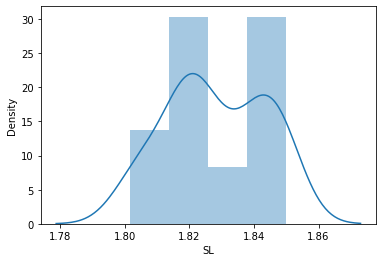

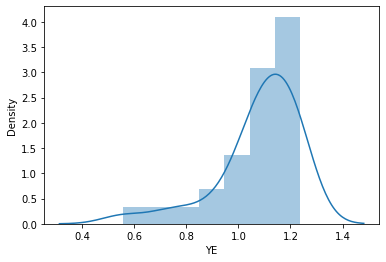

<Figure size 432x288 with 0 Axes>

In [15]:
Data_sqrt= np.sqrt(Data_1)
Data_sqrt['SL']= np.sqrt(Data_sqrt['SL'])
Data_sqrt['YE']= np.sqrt(Data_sqrt['YE'])
sns.distplot(Data_sqrt['SL'])
fig =plt.figure()
sns.distplot(Data_sqrt['YE'])
fig = plt.figure()

# Model Building

In [16]:
# load Library
import statsmodels.formula.api as smf
model= smf.ols("Salary~YearsExperience",data= Salary).fit()


<AxesSubplot:xlabel='SL', ylabel='YE'>

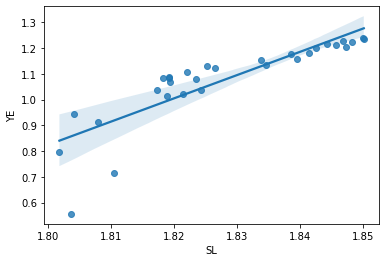

In [17]:
sns.regplot(x=Data_sqrt['SL'],y=Data_sqrt['YE'])

<AxesSubplot:xlabel='YE', ylabel='SL'>

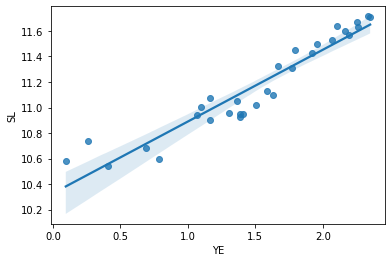

In [18]:
sns.regplot(x=Salary_1['YE'],y=Salary_1['SL'])

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        02:13:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Cofficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [21]:
#t and p-values
print(model.tvalues,'\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [22]:
#R squared Values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [23]:
# Auto prediction 

In [24]:
Pred_data=pd.Series([7,8,9,10])
Pred_data


0     7
1     8
2     9
3    10
dtype: int64

In [25]:
prediction=pd.DataFrame(Pred_data,columns=['YearsExperience'])
prediction

,YearsExperience
0,7
1,8
2,9
3,10


In [26]:
model.predict(prediction)

0     91941.936449
1    101391.898770
2    110841.861092
3    120291.823413
dtype: float64

In [27]:
model.predict(Salary)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [28]:
# In this there is no need of Log and Sqrt transformation Only for showing calculation i am doing this
